---
> # **Python 복습**
> ### **파이썬 데이터 타입**
>    - 연속형 : int(정수형) / float(실수형)
>    - 범주형 : str(문자형) / object(범주형)
>    - 논리형 : bool(True / False)
> ### **파이썬 자료 구조** 
>    - List : 순서 존재 / 중복허용 / 추가,삭제,변경 가능
>    - Tuple : 순서 존재 / 중복허용 / 추가,삭제,변경 불가
>    - Set : 순서 없음 / 중복없음 / 추가,삭제,변경 가능
>    - Dictionary {key : value} : 키-값 매칭
> ### **파이썬 구문 (Statement)**
>    - 조건문 (if / elif / else) : 특정 조건에 따라 종속문장을 수행
>    - 반복문 (for / while) : 특정 범위에 따라 종속문장이 반복 수행
>    - 예외처리 (try / except / finally) : 오류가 발생 시 예외처리
>    - 들여쓰기 : tab key 또는 Space bar를 통해 문장의 종속관계 표현
> ### **파이썬 라이브러리** 
>    - 정의 : 특정 목적을 달성하기 위해, 모아놓은 함수들의 집합
---

In [1]:
num1 = 200
num2 = 300
num1 + num2

500

In [2]:
data1 = '파이썬 데이터 분석'
data1

'파이썬 데이터 분석'

In [3]:
t1 = (100,200,300)
a1,a2,a3 = t1
print(a1,a2,a3)

100 200 300


In [4]:
try : # 기본적으로 코드가 진행되는 파트
    data1 = input("과일 종류를 입력하세요 : (사과/포도/배)")
    if data1 == '사과':
        print("링고")
    elif data1 == '포도':
        print(100)
    else:
        print("Done")
except: # 위 try 구문에서 오류가 발생시 아래 종속 문장을 수행
    print("Error")
finally : # 위 모든 코드가 실행된 뒤, 마지막으로 수행되는 코드
    print("F")

과일 종류를 입력하세요 : (사과/포도/배) 사과


링고
F


---
> ## **분석에 필요한 파이썬 라이브러리**
---

In [5]:
import numpy as np
import pandas as pd # 정형데이터 전처리 / 통계 연산 수행

import seaborn as sns # 통계적 시각화 연산
import matplotlib as mpl # 시각화 옵션 (외부)
import matplotlib.pyplot as plt # 시각화 옵션 (내부)
import plotly.express as px # 동적 그래프 시각화
import scipy.stats as stats # 통계적 가설 검정 수행
mpl.rc('font',family='Malgun Gothic') # 한글 글꼴 설정

---
> # **기계 학습 개요(Machine Learning Intro)**
> - 수식화 ( 회귀분석 → 기계학습(데이터마이닝))
> - **기계학습** : 데이터 간 연관성/관계/수식 등을 컴퓨터가 학습을 통해 도출해내는 작업
> ### **지도학습(분류모델) 절차**
>   1. 데이터 전처리 (파생변수 / 이상치 처리 / 결측치 처리)
>   2. 목표변수 (Y) 와 설명변수 (X)를 선언
>   3. 학습데이터와 검증데이터를 분할
>   4. 학습진행
>      - 특성공학
>      - 알고리즘에 의한 학습
>   5. 평가
>   6. 적용
---

---
> ### **지도학습 실습**
> #### - 사용데이터 : 렌탈 데이터
> #### - 분류 목표 : **State 열**에서 계약확정을 할 고객인지, 하지 않을 고객인지 구분
---

In [6]:
df1 = pd.read_csv("01_Data.csv")
df1.head()

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,개인,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합


---
### **1. 데이터 전처리 (결측치 처리)**
---

In [7]:
df1_clean = df1.dropna()
df1_clean.head()

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,개인,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합


In [8]:
df1_clean.State.value_counts()

계약확정     40104
해약확정       498
기간만료        33
해약진행중       12
Name: State, dtype: int64

---
### **2. 목표변수 (Y) 와 설명변수 (X)를 선언**
---

In [9]:
Y = df1_clean['State'].replace({'계약확정' : '정상', '해약확정' : '해약',
                                '기간만료' : '정상', '해약진행중' : '해약'})
X = df1_clean[['Amount_Month','Term','Age','Credit_Rank']]

---
### **3. 학습데이터와 검증데이터 분할**
---

In [10]:
!pip install scikit-learn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [13]:
print(X_train.shape)
X_train.head()

(30485, 4)


,Amount_Month,Term,Age,Credit_Rank
36797,98400,60,51.0,2.0
44561,96900,60,33.0,2.0
8355,81900,60,36.0,3.0
6502,98400,60,39.0,4.0
21842,105900,60,63.0,2.0


In [14]:
print(X_test.shape)
X_test.head()

(10162, 4)


,Amount_Month,Term,Age,Credit_Rank
16087,111900,60,36.0,4.0
38890,105900,60,44.0,1.0
33054,90900,60,53.0,7.0
9955,96900,60,41.0,6.0
9918,81900,60,52.0,6.0


In [15]:
print(Y_train.shape)
Y_train.head()

(30485,)


36797    정상
44561    정상
8355     정상
6502     정상
21842    정상
Name: State, dtype: object

In [16]:
print(Y_test.shape)
Y_test.head()

(10162,)


16087    정상
38890    정상
33054    정상
9955     정상
9918     정상
Name: State, dtype: object

---
### **4. 학습**
---

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

---
### **5. 평가(정확도)**
---

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [21]:
accuracy_score(Y_train,Y_train_pred)

0.9888141709037231

In [22]:
accuracy_score(Y_test,Y_test_pred)

0.9854359378075183

---
### **6. 새로운 데이터 입력**
---

In [23]:
x1 = input("월랜탈비용을 입력 : ")
x2 = input("계약기간을 입력 :")
x3 = input("고객연령을 입력 :")
x4 = input("신용등급을 입력 :")
new_Data = pd.DataFrame([[x1,x2,x3,x4]])

월랜탈비용을 입력 :  2
계약기간을 입력 : 3
고객연령을 입력 : 4
신용등급을 입력 : 5


In [24]:
model.predict(new_Data)

C:\Users\DMCCONET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['정상'], dtype=object)

---
# **Mission 7**
---

#### 1. df1 데이터에 대해 'Amount_Month'(월랜탈비용) 데이터에 'Term'(계약기간)데이터를 곱하여, 계약기간동안 한명의 총 납부금액 'Total_Amount'변수를 선언

In [25]:
df1['Total_Amount'] = df1['Amount_Month'] * df1['Term'] 
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,5814000
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,802800
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,802800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행,5814000
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고,5814000
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드,4715100
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드,5814000


#### 2. 'Total_Amount'값에 따라 고객의 등급을 나누고자 한다. 'Total_Amount'가 상위 10%인 고객은 'VIP' , 상위 30%인 고객은 'Special', 나머지 고객은 'Normal'로 분류하여 파생변수 'Member_Rank' 를 생성 

In [26]:
df1['Member_Rank'] = 'Normal'
df1.loc[df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.7) ,'Member_Rank'] = 'Special'
df1.loc[df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.9) ,'Member_Rank'] = 'VIP'
df1.head()

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount,Member_Rank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000,Special
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000,Special
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,5814000,Special
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,802800,Normal
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,802800,Normal


In [27]:
df1['Member_Rank'].value_counts()

Special    21145
Normal     20909
VIP         9247
Name: Member_Rank, dtype: int64

In [28]:
df1[df1['Member_Rank']=='VIP'].Total_Amount.value_counts()

6354000     5588
6714000     1228
7452000      631
6534000      329
8532000      289
7092000      205
7614000      174
8712000      140
6642000      107
7242300      105
8694000       77
6912000       66
7542000       59
7272000       57
8334000       28
7002000       24
7254000       21
8412300       15
6849000       12
6552000       11
10062000      10
6507000        9
7587000        7
8514000        7
6732000        7
7902000        6
8082000        6
7794000        3
6462000        3
7992000        3
8262000        3
7632000        3
6822000        2
8064000        2
7812000        2
8172000        2
8217000        1
9072000        1
9342000        1
7074000        1
7884000        1
6678000        1
Name: Total_Amount, dtype: int64

#### 3. 앞서 계산한   'Member_Rank'에서 'VIP'고객의 특성을 파악하고자 한다. 'Channel'유입 경로 별 'Total_Amount'의 평균과 합을 계산한 뒤, 시각화

In [29]:
df1[df1['Member_Rank']=='VIP'].pivot_table(index='Channel',values='Total_Amount',
                                           aggfunc= ['mean','sum'])

,mean,sum
,Total_Amount,Total_Amount
Channel,,
대형마트A,6.657713e+06,6637739400
대형마트C,6.534000e+06,52272000
대형마트E,6.697143e+06,3100777200
대형마트H,6.498000e+06,506844000
영업방판,6.731221e+06,43739475300
자체홈페이지,6.452250e+06,154854000
재계약,6.354000e+06,6354000
전단홍보,6.794096e+06,1698524100


In [30]:
m3 = df1[df1['Member_Rank']=='VIP'].pivot_table(index='Channel',values='Total_Amount',
                                           aggfunc= ['mean','sum']).reset_index().droplevel(axis=1,level=0)
m3.columns = ['Channel','mean','sum']
m3.head()

,Channel,mean,sum
0,대형마트A,6.657713e+06,6637739400
1,대형마트C,6.534000e+06,52272000
2,대형마트E,6.697143e+06,3100777200
3,대형마트H,6.498000e+06,506844000
4,영업방판,6.731221e+06,43739475300


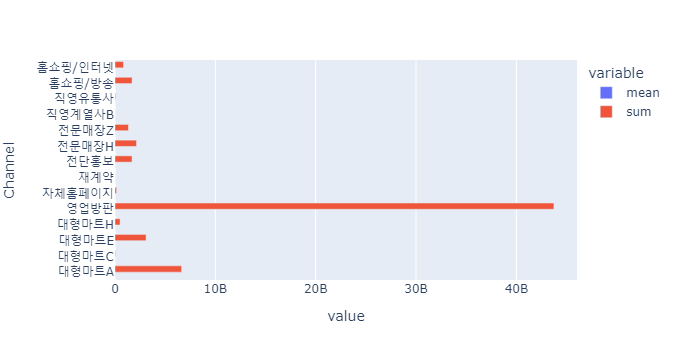

In [41]:
px.bar(m3,barmode='group',y='Channel',x=['mean','sum'])

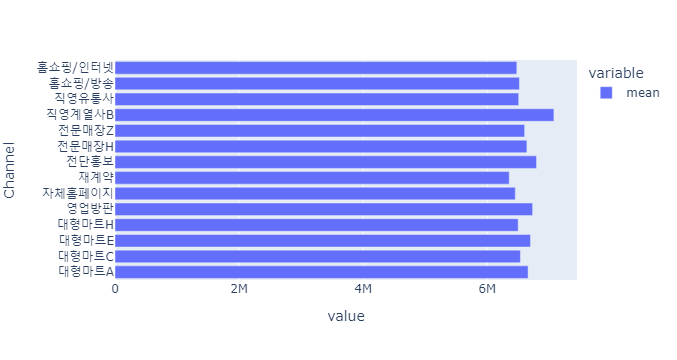

In [42]:
px.bar(m3,barmode='group',y='Channel',x=['mean'])

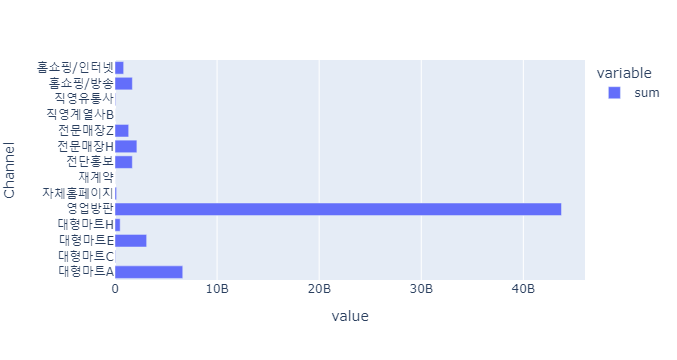

In [33]:
px.bar(m3,barmode='group',y='Channel',x=['sum'])

#### 4. 'Member_Rank'고객 등급에서 Special 고객들의 특성을 파악하고자 한다.
    - 고객의 등급과 제품군의 빈도수를 나타내는 그래프를 시각화
    - Special 고객들의 성별'Gender'에 따른 'Total_Amount'의 평균의 차이가 있는지 가설검정을 수행

In [34]:
b = df1[df1['Member_Rank']=='Special']

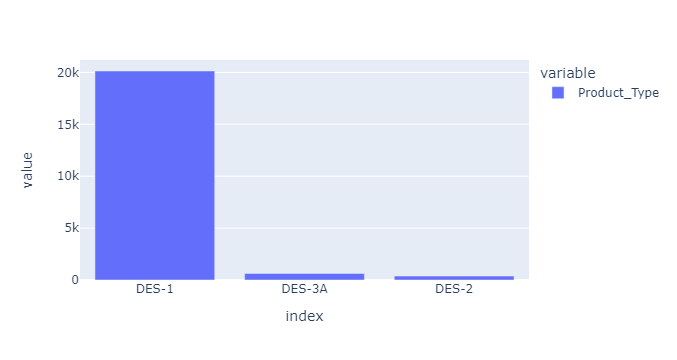

In [35]:
px.bar(b.Product_Type.value_counts())

In [36]:
b.pivot_table(index='Gender',values='Total_Amount',aggfunc='mean')

,Total_Amount
Gender,
남자,5.847325e+06
여자,5.845274e+06


**1. 정규성 검정 - Total_Amount**
- **pvalue < 0.05 이므로 대립가설 채택 : 정규분포 안따름**

In [37]:
stats.normaltest(b.Total_Amount)

NormaltestResult(statistic=12644.640868303033, pvalue=0.0)

**2. Willcoxon 검정 - Gender에 따라**
- **pvalue > 0.05 이므로 대립가설 채택 : 남자, 여자에는 차이가 없다**

In [38]:
stats.ranksums(b[b['Gender']=='남자'].Total_Amount, b[b['Gender']=='여자'].Total_Amount)

RanksumsResult(statistic=0.9285648618536416, pvalue=0.35311463902402607)

#### 5. 'Datetime'데이터를 이용해 '연도'를 계산하고, 'Product_Type'별 연도에 따른 'Total_Amount'값의 합을 계산한뒤, 2019년도 대비 2020년도 총 계약금액의 증감율을 계산

In [39]:
df1.insert(0,'DATE_dt',pd.to_datetime(df1['Datetime'],format='%Y-%m-%d'))
df1.insert(1,'Year',df1['DATE_dt'].dt.year)
df1.head()

,DATE_dt,Year,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,...,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Total_Amount,Member_Rank
0,2019-05-06,2019,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,...,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,5814000,Special
1,2020-02-20,2020,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,...,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,6174000,Special
2,2019-02-28,2019,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,...,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,5814000,Special
3,2019-05-13,2019,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,...,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,802800,Normal
4,2019-05-10,2019,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,...,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,802800,Normal


In [40]:
y_2019 = df1[df1['Year'] == 2019]['Total_Amount'].sum()
y_2020 = df1[df1['Year'] == 2020]['Total_Amount'].sum()
(y_2020-y_2019)/(y_2019)

-0.7464997589349371